# 102.5. Rubin data access with LSDB

<div style="max-width:300px; float: left; margin-right: 1em">

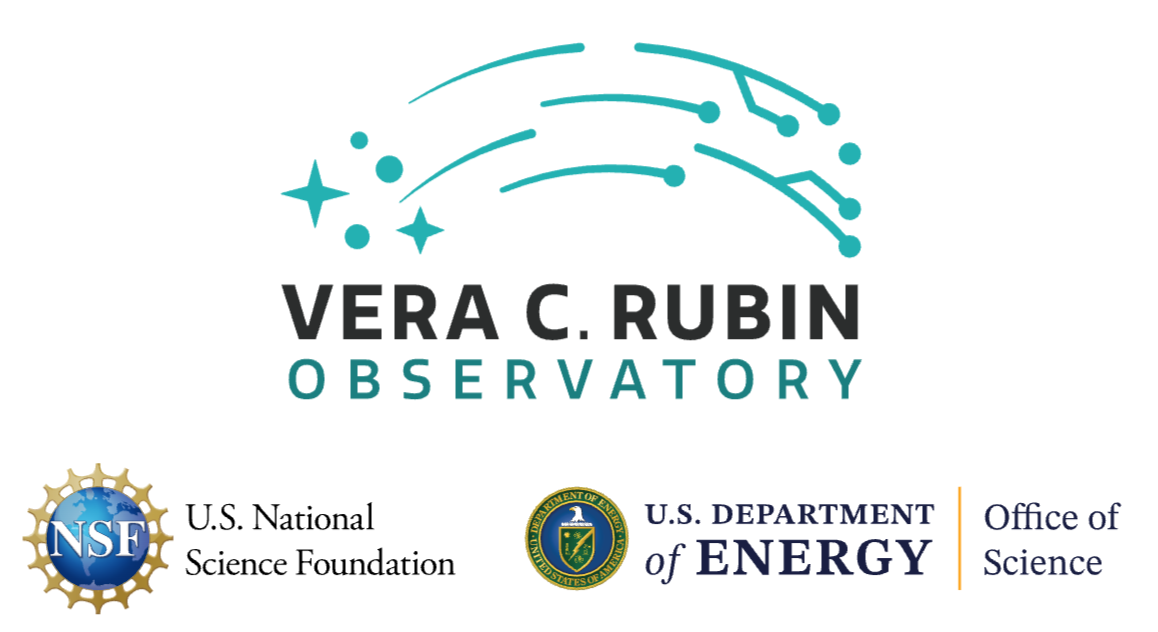

</div>

For the Rubin Science Platform at data.lsst.cloud. <br>
Data Release: <a href="https://dp1.lsst.io/">Data Preview 1</a> <br>
Container Size: Large <br>
LSST Science Pipelines version: Release r29.2.0 <br>
Last verified to run: 2025-09-09 <br>
Repository: <a href="https://github.com/lsst/tutorial-notebooks">github.com/lsst/tutorial-notebooks</a> <br>

**Learning objective:** How to access Rubin data in LSDB format.

**LSST data products:** `Object`, `DIAObject`

**Packages:** `lsdb`

**Credit:**
Originally developed by the Rubin Community Science team.
Please consider acknowledging them if this notebook is used for the preparation of journal articles, software releases, or other notebooks.

**Get Support:**
Everyone is encouraged to ask questions or raise issues in the
<a href="https://community.lsst.org/c/support">Support Category</a>
of the Rubin Community Forum.
Rubin staff will respond to all questions posted there.

## 1. Introduction

[LSDB](https://docs.lsdb.io/) (Large Scale Database) is an open-source Python framework that enables fast all-sky cross-matching, bulk application of user-defined functions,  
  and simplified analysis of time-domain (light curve) data.
It operates on data stored in the [HATS](https://hats.readthedocs.io/) data format that provides an efficient, spatially-indexed format for storing catalog data.
Built on top of [Dask](https://docs.dask.org/), LSDB uses the [HATS](https://hats.readthedocs.io/) (Hierarchical Adaptive Tiling Scheme) data format ([HEALPix](https://healpix.sourceforge.io/documentation.php)-sharded [Parquet](https://parquet.apache.org/docs/)) to efficiently perform spatial operations.

LSDB also hosts many other datasets stored in the HATS format, beyond the DP1 catalogs shown in this tutorial.

**Note:** This notebook is intended only as a very simple tutorial. For more detailed examples and advanced use cases, see the full set of LSDB tutorials at [LSDB tutorials](https://docs.lsdb.io/en/latest/tutorials.html).  

**References:**

- Descriptions of LSDB-formatted Data Preview 1 (DP1) data: [https://data.lsdb.io/](https://data.lsdb.io/ )
- LSDB documentation: [docs.lsdb.io](https://docs.lsdb.io/en/latest/index.html)
- [Working with Rubin Data using LSDB](https://docs.lsdb.io/en/latest/tutorial_toc/toc_rubin.html)
- [LSDB hackathon at the Rubin Community Workshop 2025](https://github.com/lincc-frameworks/RCW_Hackathon_2025_LSDB/tree/main)

**Related tutorials:** The 300-level tutorial on how to access photometric redshifts in LSDB-formatted files. 

### 1.1. Import packages

Import the [LSDB package](https://github.com/astronomy-commons/lsdb/) to work with LSDB-formatted files, along with standard astronomy packages and LSST software for data access.

In [1]:
import lsdb
from upath import UPath
from lsst.daf.butler import Butler

## 2. Accessing catalogs

The `lsdb` read-only catalogs at the `data.lsst.cloud` Rubin Science Platform are located at `/rubin/lsdb_data`, and they consist of `Object`, `DIAObject` and photometric redshift (photo-z) catalogs:
- `dia_object_collection`
- `object_collection` 
- `object_collection_lite` 
- `object_photoz`

The schemas for `dia_object_collection`, `object_collection`, and `object_collection_lite` with column names, units, and descriptions can be checked at the [Data Preview 1 (DP1) schema website](https://sdm-schemas.lsst.io/dp1.html) via the `Object` and `DiaObject` tables.

Set the base path.

In [2]:
base_path = UPath("/rubin/lsdb_data")

### 2.1. Object catalog

#### 2.1.1 Load and display the catalog

In [41]:
object_cat = lsdb.open_catalog(base_path / "object_collection")

In [42]:
object_cat

,coord_dec,coord_decErr,coord_ra,coord_raErr,g_psfFlux,g_psfFluxErr,g_psfMag,g_psfMagErr,i_psfFlux,i_psfFluxErr,i_psfMag,i_psfMagErr,objectId,patch,r_psfFlux,r_psfFluxErr,r_psfMag,r_psfMagErr,refBand,refFwhm,shape_flag,shape_xx,shape_xy,shape_yy,tract,u_psfFlux,u_psfFluxErr,u_psfMag,u_psfMagErr,x,xErr,y,y_psfFlux,y_psfFluxErr,y_psfMag,y_psfMagErr,yErr,z_psfFlux,z_psfFluxErr,z_psfMag,z_psfMagErr,objectForcedSource
npartitions=389,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Order: 6, Pixel: 130",double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],int64[pyarrow],int64[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],string[pyarrow],float[pyarrow],bool[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],int64[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],"nested<coord_ra: [double], coord_dec: [double]..."
"Order: 8, Pixel: 2176",...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Order: 9, Pixel: 2302101",...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Order: 7, Pixel: 143884",...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


**Lazily loaded catalogs:** note the message under the displayed table above, that all of the columns have been loaded "lazily".
This is always the default for LSDB catalogs, and it means that only the metadata is loaded at first.
This way, LSDB can plan how tasks will be executed in the future without actually doing any computation.

`Order` is the HEALPix resolution, and `Pixel` is the HEALPix index of the specific sky patch.

#### 2.1.2 Columns

Display the 42 loaded columns.

In [5]:
object_cat.columns

Index(['coord_dec', 'coord_decErr', 'coord_ra', 'coord_raErr', 'g_psfFlux',
       'g_psfFluxErr', 'g_psfMag', 'g_psfMagErr', 'i_psfFlux', 'i_psfFluxErr',
       'i_psfMag', 'i_psfMagErr', 'objectId', 'patch', 'r_psfFlux',
       'r_psfFluxErr', 'r_psfMag', 'r_psfMagErr', 'refBand', 'refFwhm',
       'shape_flag', 'shape_xx', 'shape_xy', 'shape_yy', 'tract', 'u_psfFlux',
       'u_psfFluxErr', 'u_psfMag', 'u_psfMagErr', 'x', 'xErr', 'y',
       'y_psfFlux', 'y_psfFluxErr', 'y_psfMag', 'y_psfMagErr', 'yErr',
       'z_psfFlux', 'z_psfFluxErr', 'z_psfMag', 'z_psfMagErr',
       'objectForcedSource'],
      dtype='object')

Optional: uncomment the cell below to display the names of all the 1304 columns from the `Object` catalog.

In [9]:
# object_cat.all_columns

Check which columns are [nested](https://docs.lsdb.io/en/latest/tutorials/pre_executed/nestedframe.html).

In [7]:
object_cat.nested_columns

['objectForcedSource']

Display the fields in the nested column.

In [8]:
object_cat["objectForcedSource"].nest.fields

['coord_ra',
 'coord_dec',
 'visit',
 'detector',
 'band',
 'psfFlux',
 'psfFluxErr',
 'psfFlux_flag',
 'psfDiffFlux',
 'psfDiffFluxErr',
 'psfDiffFlux_flag',
 'pixelFlags_bad',
 'pixelFlags_cr',
 'pixelFlags_crCenter',
 'pixelFlags_edge',
 'pixelFlags_interpolated',
 'pixelFlags_interpolatedCenter',
 'pixelFlags_nodata',
 'pixelFlags_saturated',
 'pixelFlags_saturatedCenter',
 'pixelFlags_suspect',
 'pixelFlags_suspectCenter',
 'invalidPsfFlag',
 'forcedSourceId',
 'psfMag',
 'psfMagErr',
 'midpointMjdTai']

Load only selected columns

In [38]:
use_columns = ['coord_dec', 'coord_decErr', 'coord_ra', 'coord_raErr',
               'g_psfFlux', 'g_psfFluxErr', 'g_psfMag', 'g_psfMagErr']

In [39]:
object_cat_selected_columns = lsdb.open_catalog(base_path / "object_collection",
                                                columns=use_columns)

In [40]:
object_cat_selected_columns.columns

Index(['coord_dec', 'coord_decErr', 'coord_ra', 'coord_raErr', 'g_psfFlux',
       'g_psfFluxErr', 'g_psfMag', 'g_psfMagErr'],
      dtype='object')

#### 2.1.3 Cone searchs

Execute a cone search on the object catalog using the coordinates (in degrees) of the Extended Chandra Deep Field South DP1 target field, with a radius of 0.1 deg.

In [44]:
ra_ecdfs = 53.16
dec_ecdfs = -28.10

In [45]:
object_cat_ecdfs = object_cat.cone_search(ra=ra_ecdfs, dec=dec_ecdfs,
                                          radius_arcsec=0.1 * 3600.0)

This table contains only 8 partitions, compared to the 389 described in Section 2.1.1, due to the 0.1-degree spatial restriction.

In [47]:
object_cat_ecdfs

,coord_dec,coord_decErr,coord_ra,coord_raErr,g_psfFlux,g_psfFluxErr,g_psfMag,g_psfMagErr,i_psfFlux,i_psfFluxErr,i_psfMag,i_psfMagErr,objectId,patch,r_psfFlux,r_psfFluxErr,r_psfMag,r_psfMagErr,refBand,refFwhm,shape_flag,shape_xx,shape_xy,shape_yy,tract,u_psfFlux,u_psfFluxErr,u_psfMag,u_psfMagErr,x,xErr,y,y_psfFlux,y_psfFluxErr,y_psfMag,y_psfMagErr,yErr,z_psfFlux,z_psfFluxErr,z_psfMag,z_psfMagErr,objectForcedSource
npartitions=8,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Order: 9, Pixel: 2299851",double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],int64[pyarrow],int64[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],string[pyarrow],float[pyarrow],bool[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],int64[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],"nested<coord_ra: [double], coord_dec: [double]..."
"Order: 9, Pixel: 2299854",...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Order: 9, Pixel: 2299876",...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Order: 9, Pixel: 2299878",...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [48]:
object_cat_ecdfs.columns

Index(['coord_dec', 'coord_decErr', 'coord_ra', 'coord_raErr', 'g_psfFlux',
       'g_psfFluxErr', 'g_psfMag', 'g_psfMagErr', 'i_psfFlux', 'i_psfFluxErr',
       'i_psfMag', 'i_psfMagErr', 'objectId', 'patch', 'r_psfFlux',
       'r_psfFluxErr', 'r_psfMag', 'r_psfMagErr', 'refBand', 'refFwhm',
       'shape_flag', 'shape_xx', 'shape_xy', 'shape_yy', 'tract', 'u_psfFlux',
       'u_psfFluxErr', 'u_psfMag', 'u_psfMagErr', 'x', 'xErr', 'y',
       'y_psfFlux', 'y_psfFluxErr', 'y_psfMag', 'y_psfMagErr', 'yErr',
       'z_psfFlux', 'z_psfFluxErr', 'z_psfMag', 'z_psfMagErr',
       'objectForcedSource'],
      dtype='object')

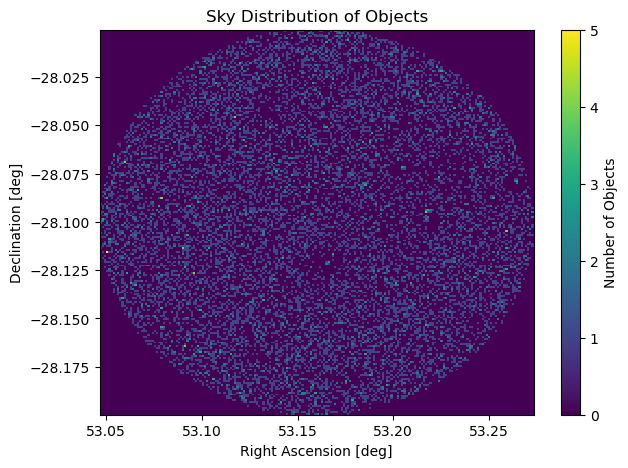

In [50]:
# Example 1: Histogram of i-band PSF magnitudes
#plt.figure(figsize=(7,5))
#plt.hist(object_cat_ecdfs['i_psfMag'], bins=50, color='steelblue', alpha=0.7)
#plt.xlabel("i-band PSF Magnitude")
#plt.ylabel("Number of Objects")
#plt.title("Distribution of i-band PSF Magnitudes")
#plt.show()

# Example 2: 2D histogram of sky coordinates (RA vs Dec)
plt.figure(figsize=(7,5))
plt.hist2d(object_cat_ecdfs['coord_ra'], object_cat_ecdfs['coord_dec'],
           bins=200, cmap='viridis')
plt.colorbar(label="Number of Objects")
plt.xlabel("Right Ascension [deg]")
plt.ylabel("Declination [deg]")
plt.title("Sky Distribution of Objects")
plt.show()

In [ ]:
# Example 1: Histogram of i-band PSF magnitudes
plt.figure(figsize=(7,5))
plt.hist(object_cat_ecdfs['r_psfMag'], bins=50, color='steelblue', alpha=0.7)
plt.xlabel("i-band PSF Magnitude")
plt.ylabel("Number of Objects")
plt.title("Distribution of i-band PSF Magnitudes")
plt.show()

/opt/lsst/software/stack/conda/envs/lsst-scipipe-10.1.0/lib/python3.12/site-packages/dask/dataframe/dask_expr/_collection.py:1435: UserWarning: Dask currently has limited support for converting pandas extension dtypes to arrays. Converting float[pyarrow] to object dtype.
  warnings.warn(
/opt/lsst/software/stack/conda/envs/lsst-scipipe-10.1.0/lib/python3.12/site-packages/dask/dataframe/dask_expr/_collection.py:1435: UserWarning: Dask currently has limited support for converting pandas extension dtypes to arrays. Converting float[pyarrow] to object dtype.
  warnings.warn(


Optional: uncomment the following cell and press "tab" to browse more availabe methods.

In [ ]:
# object_cat.

### 2.2. Lite object catalog

The `object_collection_lite` LSDB catalog is a reduced version of the `Object` catalog in `object_collection`. It contains 74 commonly used columns that provide basic object properties, including object identifiers, sky coordinates with uncertainties, basic shape measurements, flags, and PSF- and Kron-based fluxes and magnitudes (with uncertainties) across the six Legacy Survey of Space and Time (LSST) bands (`u`, `g`, `r`, `i`, `z`, and `y`).

Get the catalog

In [15]:
object_cat_lite = lsdb.open_catalog(base_path / "object_collection_lite")

Display all the columns.

In [13]:
object_cat_lite.all_columns

['tract',
 'patch',
 'z_psfFlux',
 'z_psfFluxErr',
 'z_kronRad',
 'z_kronFlux',
 'z_kronFluxErr',
 'u_psfFlux',
 'u_psfFluxErr',
 'u_kronRad',
 'u_kronFlux',
 'u_kronFluxErr',
 'g_psfFlux',
 'g_psfFluxErr',
 'g_kronRad',
 'g_kronFlux',
 'g_kronFluxErr',
 'r_psfFlux',
 'r_psfFluxErr',
 'r_kronRad',
 'r_kronFlux',
 'r_kronFluxErr',
 'i_psfFlux',
 'i_psfFluxErr',
 'i_kronRad',
 'i_kronFlux',
 'i_kronFluxErr',
 'y_psfFlux',
 'y_psfFluxErr',
 'y_kronRad',
 'y_kronFlux',
 'y_kronFluxErr',
 'parentObjectId',
 'coord_ra',
 'coord_dec',
 'coord_raErr',
 'coord_decErr',
 'refBand',
 'x',
 'y',
 'xErr',
 'yErr',
 'refFwhm',
 'shape_xx',
 'shape_yy',
 'shape_xy',
 'detect_isIsolated',
 'shape_flag',
 'objectId',
 'u_psfMag',
 'u_psfMagErr',
 'u_kronMag',
 'u_kronMagErr',
 'g_psfMag',
 'g_psfMagErr',
 'g_kronMag',
 'g_kronMagErr',
 'r_psfMag',
 'r_psfMagErr',
 'r_kronMag',
 'r_kronMagErr',
 'i_psfMag',
 'i_psfMagErr',
 'i_kronMag',
 'i_kronMagErr',
 'z_psfMag',
 'z_psfMagErr',
 'z_kronMag',
 'z_kro

### 2.2 Dia Object catalog

In [20]:
dia_object_cat = lsdb.open_catalog(base_path / "dia_object_collection")

In [21]:
dia_object_cat

,dec,diaObjectId,nDiaSources,ra,radecMjdTai,tract,diaObjectForcedSource,diaSource
npartitions=208,,,,,,,,
"Order: 6, Pixel: 130",double[pyarrow],int64[pyarrow],int64[pyarrow],double[pyarrow],double[pyarrow],int64[pyarrow],"nested<band: [string], coord_dec: [double], co...","nested<band: [string], centroid_flag: [bool], ..."
"Order: 6, Pixel: 136",...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...
"Order: 11, Pixel: 36833621",...,...,...,...,...,...,...,...
"Order: 7, Pixel: 143884",...,...,...,...,...,...,...,...


### 2.3 Phot-z catalog

In [22]:
pz_cat = lsdb.open_catalog(base_path / "object_photoz")

Display the results.

In [23]:
pz_cat

,coord_dec,coord_ra,g_cModelMag,g_cModelMagErr,g_gaap1p0Mag,g_gaap1p0MagErr,g_gaap3p0Mag,g_gaap3p0MagErr,g_kronMag,g_kronMagErr,g_psfMag,g_psfMagErr,g_sersicMag,g_sersicMagErr,i_cModelMag,i_cModelMagErr,i_gaap1p0Mag,i_gaap1p0MagErr,i_gaap3p0Mag,i_gaap3p0MagErr,i_kronMag,i_kronMagErr,i_psfMag,i_psfMagErr,i_sersicMag,i_sersicMagErr,objectId,r_cModelMag,r_cModelMagErr,r_gaap1p0Mag,r_gaap1p0MagErr,r_gaap3p0Mag,r_gaap3p0MagErr,r_kronMag,r_kronMagErr,r_psfMag,r_psfMagErr,r_sersicMag,r_sersicMagErr,u_cModelMag,u_cModelMagErr,u_gaap1p0Mag,u_gaap1p0MagErr,u_gaap3p0Mag,u_gaap3p0MagErr,u_kronMag,u_kronMagErr,u_psfMag,u_psfMagErr,u_sersicMag,u_sersicMagErr,y_cModelMag,y_cModelMagErr,y_gaap1p0Mag,y_gaap1p0MagErr,y_gaap3p0Mag,y_gaap3p0MagErr,y_kronMag,y_kronMagErr,y_psfMag,y_psfMagErr,y_sersicMag,y_sersicMagErr,z_cModelMag,z_cModelMagErr,z_gaap1p0Mag,z_gaap1p0MagErr,z_gaap3p0Mag,z_gaap3p0MagErr,z_kronMag,z_kronMagErr,z_psfMag,z_psfMagErr,z_sersicMag,z_sersicMagErr,lephare_z_median,lephare_z_mean,lephare_z_mode,lephare_z_err95_low,lephare_z_err95_high,lephare_z_err68_low,lephare_z_err68_high,knn_z_median,knn_z_mode,knn_z_err95_low,knn_z_err95_high,knn_z_err68_low,knn_z_err68_high,tpz_z_median,tpz_z_mean,tpz_z_mode,tpz_z_err95_low,tpz_z_err95_high,tpz_z_err68_low,tpz_z_err68_high,cmnn_z_median,cmnn_z_mean,cmnn_z_mode,cmnn_z_err95_low,cmnn_z_err95_high,cmnn_z_err68_low,cmnn_z_err68_high,gpz_z_median,gpz_z_mean,gpz_z_mode,gpz_z_err95_low,gpz_z_err95_high,gpz_z_err68_low,gpz_z_err68_high,bpz_z_median,bpz_z_mean,bpz_z_mode,bpz_z_err95_low,bpz_z_err95_high,bpz_z_err68_low,bpz_z_err68_high,dnf_z_median,dnf_z_mean,dnf_z_mode,dnf_z_err95_low,dnf_z_err95_high,dnf_z_err68_low,dnf_z_err68_high,fzboost_z_median,fzboost_z_mean,fzboost_z_mode,fzboost_z_err95_low,fzboost_z_err95_high,fzboost_z_err68_low,fzboost_z_err68_high
npartitions=4,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Order: 3, Pixel: 2",double[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],int64[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow]

## 3. Sky partitions

LSDB catalogs are divided into **partitions**, which reflect how the LSDB-formatted files are stored.
Each partition contains approximately the same number of objects, so partitions are not equal-area regions of the sky.
The **HATS partitioning scheme** assigns smaller partitions to dense regions (for example, the Galactic bulge) and larger partitions to sparse regions, ensuring balanced row counts across files.

The `plot_pixels` method of a catalog object visualizes these partitions.
The result is not a science-driven sky coverage map but a display of the polygonal partition boundaries.
Pixel colors represent pixel sizes, with smaller pixels corresponding to regions of higher source density.

/opt/lsst/software/stack/conda/envs/lsst-scipipe-10.1.0/lib/python3.12/site-packages/hats/inspection/visualize_catalog.py:303: UserWarning: This plot contains HEALPix pixels smaller than a pixel of the plot. Some values may be lost
  warnings.warn(


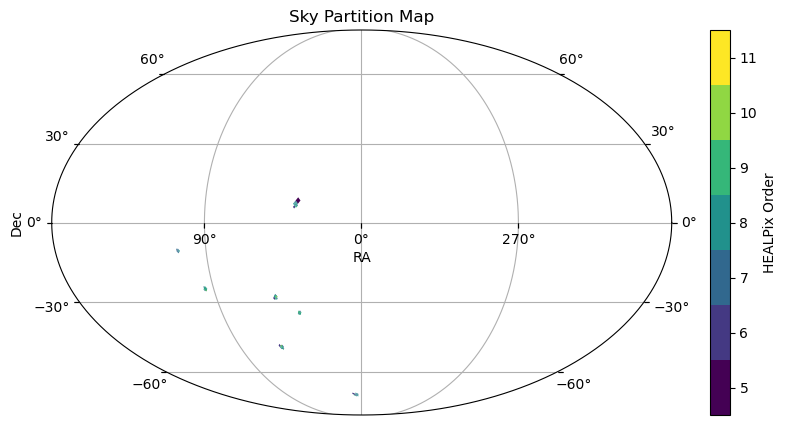

In [34]:
fig = object_cat.plot_pixels(plot_title="Object Cat Sky Partition Map")

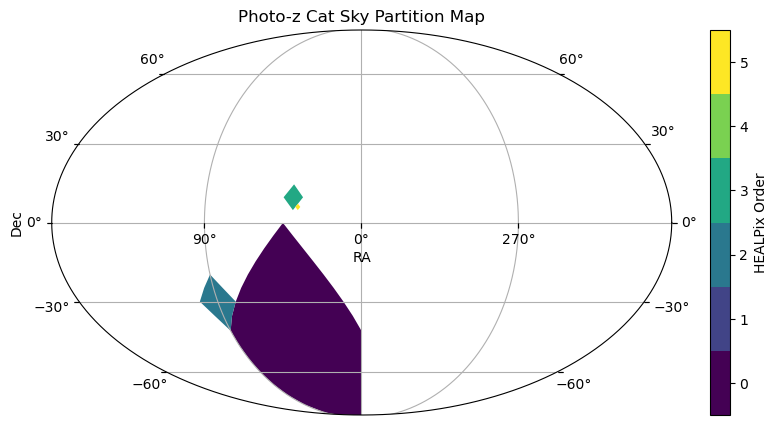

In [35]:
fig = pz_cat.plot_pixels(plot_title="Photo-z Cat Sky Partition Map")